In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from transformer_pipeline import drop_rows, get_features_transformer
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from metrics import *
from sklearn.cluster import DBSCAN
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("data/movie_statistic_dataset.csv")
df = drop_rows(df)

# Hierarchcal clustering

In [11]:
AG_transformer = make_pipeline(get_features_transformer(PowerTransformer(method="box-cox"),
                                          PowerTransformer(method="box-cox"),
                                          StandardScaler(),
                                          StandardScaler()), MinMaxScaler())
AG_X = AG_transformer.fit_transform(df)

In [12]:
model = AgglomerativeClustering()

parameters = {
    "n_clusters": [None],
    "linkage": ['ward', 'complete', 'average', 'single'],
    "distance_threshold": uniform(5,40)}

score = {
    "silhouette_score": silhouette,
    "calinski_harabasz_score": calinski_harabasz,
    "davies_bouldin_score": davies_bouldin}

In [13]:
tester = RandomizedSearchCV(estimator=model,
                            param_distributions= parameters,
                            random_state=14, 
                            scoring=score,
                            refit='silhouette_score',
                            n_iter=100,
                            cv=5) 

In [14]:
random_result = tester.fit(AG_X)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))


Best: 0.220172 using {'distance_threshold': 5.321877941192716, 'linkage': 'ward', 'n_clusters': None}


In [15]:
model = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=10)
model.fit(AG_X)
model.n_clusters_

29

# DBSCAN

In [22]:
DB_transformer = make_pipeline(get_features_transformer())
DB_X = DB_transformer.fit_transform(df)
DB_X.shape

(3490, 19)

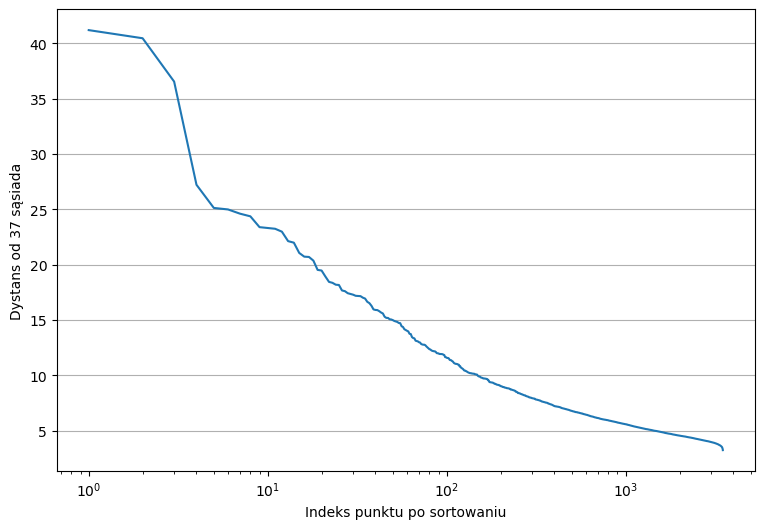

In [24]:
minPts = 38
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(DB_X)
distances, indices = nbrs.kneighbors(DB_X)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od 37 sąsiada')
ax1.plot(list(range(1,DB_X.shape[0]+1)), distanceDec)
plt.xscale('log')
plt.grid(axis='y')

plt.show()


In [38]:
#SOMETHING IS WRONG BUT IT IS THE END FOR TODAY
model = DBSCAN()
parameters = {
    "eps": uniform(0.1, 0.5), #it suppose to be points with great loss on the plot but they give nan :)
    "min_samples": [minPts],
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

score = {
    "silhouette_score": silhouette,
    "calinski_harabasz_score": calinski_harabasz,
    "davies_bouldin_score": davies_bouldin}

In [39]:
tester = RandomizedSearchCV(estimator=model,
                            param_distributions= parameters,
                            random_state=14, 
                            scoring=score,
                            refit='silhouette_score',
                            n_iter=10,
                            # cv=5
                            ) 

In [40]:
random_result = tester.fit(AG_X)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: -0.040890 using {'algorithm': 'kd_tree', 'eps': 0.5788018696829454, 'min_samples': 38}


how TF eps is higher than top value in uniform?


# HDBSCAN

I JUST PREPARED THE TEMPLATE

In [ ]:
HDB_transformer = make_pipeline(get_features_transformer())
HDB_X = HDB_transformer.fit_transform(df)

In [ ]:
model = AgglomerativeClustering()

parameters = {
    "n_clusters": [None],
    "linkage": ['ward', 'complete', 'average', 'single'],
    "distance_threshold": uniform(5,40)}

score = {
    "silhouette_score": silhouette,
    "calinski_harabasz_score": calinski_harabasz,
    "davies_bouldin_score": davies_bouldin}

In [ ]:
tester = RandomizedSearchCV(estimator=model,
                            param_distributions= parameters,
                            random_state=14, 
                            scoring=score,
                            refit='silhouette_score',
                            n_iter=100,
                            cv=5) 

In [ ]:
random_result = tester.fit(AG_X)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))